# Compressing Data via Dimensionality Reduction

In this notebook, we will cover the following topics:-

- **Principal Component Analysis (PCA)** for unsupervised data compression
- **Linear Discriminant Analysis (LDA)** for supervised dimensionality reduction technique for maximizing class separability
- Nonlinear dimensionality reduction vis **Kernel Principal Component Analysis (KPCA)**

# PCA

PCA is an unsupervised *linear transformation* technique that is widely used across different fields, most prominently for feature extraction and dimensionality reduction. Other popular areas of PCA are EDA (we will only talk about area of PCA in ml, but it is also used in de-noising of signals, genome data analysis, etc)

PCA helps us to identify patterns in data based on the *correlation* between features.

PCA aims to find the directions of maximum variance in high dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

*Steps to perform PCA*

1. Standarize the data.
2. Constructing the covariance matrix.
3. Obtaining the eigenvalues and eigenvectors of the covariance matrix.
4. Sorting the eigenvalues by decreasing order to rank the eigen vectors.

**Covariance Matrix**

covariance represent how much the two variable are related with each other, the relationship can be positive, negarive or none.

$ \sigma _{jk} = \frac {1} {n} \sum ^n _{(i=1)} ( x ^{(i)} _j - \nu _j)( x ^{(i)} _j - \nu _k) $

Here, $ \nu _j and \nu _k $ are the sample mean of feature j and k.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine.data', header = None)

In [3]:
X, y = df.iloc[:,1:].values, df.iloc[:,0].values

In [4]:
#splitting the dataset, in ratio of 70:30 and also making sure that proportions of classes are equal in train and test set
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

In [6]:
#standarization the data, it's important in PCA
#first step

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

The eigenvectors of the covariance matrix represent the prinicipal component (the direction of the maximum variance), whereas the corresponding eigenvalues will define their magnitude.

In [7]:
#second step
#making the covariance matrix
cov_mat = np.cov(X_train_std.T) #we are doing transpose to make our dataset dimensions X samples. (output -> d X d)


In [8]:
#third step
#here we will calculate eigen value and eigen vectors
#covmat - lambda * Identity_matrix = 0

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) #we will have here 13 eigen_values 

print('13 eigen vals are', eigen_vals)
print('13 eigen vectors are ', eigen_vecs)

13 eigen vals are [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]
13 eigen vectors are  [[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
   2.90625226e-01 -2.99096847e-01 -7.90529293e-02  3.68176414e-01
   3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
  -8.95378697e-02 -6.27036396e-01  2.74002014e-01  1.25775752e-02
  -1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
   1.60834991e-01 -3.89128239e-04 -1.32328045e-01 -1.77578177e-01
  -3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
  -5.15873402e-02  4.05836452e-02 -2.23999097e-01  4.40592110e-01
   2.43373853e-01 -1.30485780e-

Since, we want want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, we only select the subset of the eigenvectors(prinicipal components) that contains most of the information(variance). <br>
The eigenvalues defines the magnitude of the eigenvectors, so we have to sort the eigenvalues by decreasing magnitude, and we will choose k eigenvectors from them

## Total and explained variance

Here we will be plotting *variance explained ratios* of the given eigenvalues. 

**Total variance** is the sum of variances of all individual principal components(eigen vectors magnitue .ie. eigen value).

The fraction of **variance explained** by a principal component is the ratio between the variance of that principal component and the total variance.

i.e 

$ \lambda _j = \frac {\lambda _j} { \sum ^d _{(j=1)} \lambda _j} $

In [9]:
tot = np.sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp) #flattened array


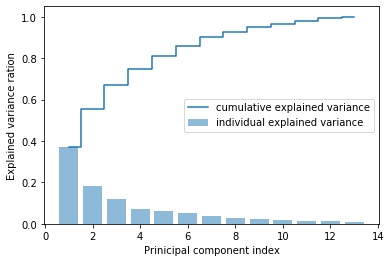

In [10]:
plt.bar(range(1,14), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid', label  = 'cumulative explained variance')
plt.ylabel('Explained variance ration')
plt.xlabel('Prinicipal component index')
plt.legend(loc = 'best')
plt.show()

The resulting plot indicates that the first principal component alone accounts for approx 40 percent of the variance. and first two principal component account for 60 percent of total variance.

## Feature Transformation

After successfully finding eigen values and eigen vectors, we will be performing following steps:-

- Select *k* eigenvectors, which corresponds to the *k* largest eigenvalues. (k<=d).
- Construct a project matrix **W** from the top *k* eigenvectors.
- Transform the d-dimensional input dataset **X** using the projection matrix **W** to obtain the new k-dimensional feature subspace.

In [11]:
#make a pair for eigenvalue and eigenvector and they will sort it

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])  for i in range(len(eigen_vals))]

#sorting
eigen_pairs.sort(key = lambda k:k[0], reverse = True) #we are sorting according to key value.

In [12]:
eigen_pairs[0][1]

array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651])

In [13]:
#we will be using first 2 prinicipal component that accounts for 60 percent variance

w = np.hstack((eigen_pairs[0][1][:,np.newaxis], eigen_pairs[1][1][:,np.newaxis]))

print('Matrix W\n', w) #13 X 2 matrix will be generated 

Matrix W
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [14]:
#here we will be generate our new feature X_new = X_std * W

X_train_pca = X_train_std.dot(w)

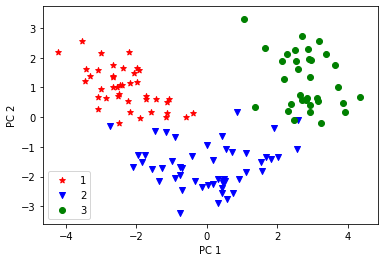

In [15]:
colors = ['r','b','g']
markers = ['*','v','o']

for l, c, m, in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0], X_train_pca[y_train==l,1], c = c, marker = m, label = l)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

we can observe in the figure that x axis is more spread because x axis is prinicpal component 1 with maximum variance. Remember PCA is a unsupervised technique hence it doesn't use any class label information

## PCA implementation using Sklearn library

In [16]:
from matplotlib.colors import ListedColormap

In [17]:
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    
    color = ['red','green','blue','cyan','gray','lightgreen']
    marker = ['v','^','o','x','s','*']
    
    cmap = ListedColormap(color[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:, 1].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,0].max() + 1
    
    xx1, xx2 = np.meshgrid(
                np.arange(x1_min, x1_max, resolution),
                np.arange(x2_min, x2_max, resolution)
    )
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, cmap=cmap, alpha = 0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl, 0], X[y==cl,1], color = color[idx], marker = marker[idx], edgecolors='black', alpha = 0.6, label = cl)
        
    

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2) #we will be choosing first two principal components

In [20]:
pca.fit(X_train_std) #giving the standarize data

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train_pca,y_train)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

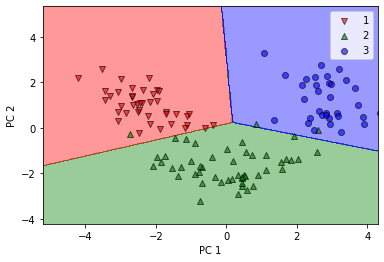

In [24]:
plot_decision_regions(X_train_pca, y_train, model)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'best')
plt.show()

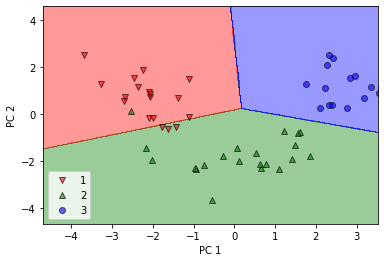

In [25]:
#let's plot our decison plot on test data set
plot_decision_regions(X_test_pca, y_test, model)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'best')
plt.show()

In [26]:
#practicing something
pca = PCA(n_components=None) #when none it will be of d dimensions, d is the feature set in training data
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
X_train_pca_new = pca.transform(X_train_std)
X_test_pca_new = pca.transform(X_test_std)

In [28]:
eigenvalue = pca.explained_variance_

In [29]:
total = np.sum(eigenvalue)

In [30]:
exp_var = [(i/total) for i in eigenvalue]

In [31]:
cum_exp_var = np.cumsum(exp_var)

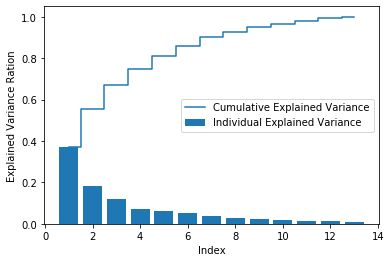

In [32]:
plt.bar(range(1,14), exp_var, label = 'Individual Explained Variance')
plt.step(range(1,14), cum_exp_var, where = 'mid', label = 'Cumulative Explained Variance')
plt.xlabel('Index')
plt.ylabel('Explained Variance Ration')
plt.legend(loc = 'best')
plt.show()

# LDA

LDA is similar to PCA but the difference is that the projection axis is choosen such that the margin between classes increases, also it is supervised technique other is unsupervised.

So you can see the motivation is diffent in PCA and LDA, PCA choose othogonal axes such that the variance is maxium, whereas LCA choose axes such that the margin between classes become maximum.

Remember Both LCA and PCA is a linear transformation technique that can be used to reduce the number of dimensions in dataset, but how they choose to do is different.

**One assumption in LDA is that the data is normally distributed**. Also we assume that the classes have identical covariance matrices and that the feature are statistically independant of each other. However, even if one or more of those assumptions are violated, LDA for dimensionality reduction can still work reasonably well.


In LDA we maximizes the distance between mean among the categories and decreases the variance among categories (Look at video on youtube *statquest* channel on LDA).

The ratio of $ \frac {(\nu _1 - \nu _2) ^ 2} {s _1 ^2 + s _2 ^2} $ should be maximum, and the projection axis that get this result is choosen as our Linear Discriminant.<br>
Here, $\nu $ is mean and s is scatter (variance).

## Steps to perform LDA

1. Standarize the d-dimensional dataset (d is the number of features)
2. <u>For each class</u>, compute the d-dimensional mean vector.
3. Construct the <u>between class scatter matrix</u> $ S _B $ and the <u>within class scatter matrix</u> $ S _w $
4. Compute the eigenvectors and corresponding eigenvalues of the matrix $ S _w ^{-1} S _B $
5. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
6. Choose the *k* eigenvectors that correspond to the *k* largest eigenvalues to construct a **d X k** dimensional transformation matrix **W**; the eigenvectors are the column of this matrix.
7. Project the samples onto the new feature subspace using the transformation matrix **W**.

since we already have performed step 1 above, let's directly move to step 2.... we are going to calculate mean vector



In [37]:
np.set_printoptions(precision=4)
mean_vecs = []

for label in range(1,4): #since we have 3 classes label as  1, 2 and 3
    mean_vecs.append(np.mean(
        X_train_std[y_train==label],
        axis = 0
    ))
    print('MV {}: {}\n'.format(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



Using the mean vectors, we can now compute the <u>within-class scatter matrix</u> $ S _w $:

$ S _w = \sum _{j=1} ^c S _i $

$ S _i = \sum ^c _{x\to $
